In [234]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Read data

Source: http://www.astronexus.com/hyg

Additional reference: https://github.com/RobertoIA/Hertzsprung-Russell/blob/master/Hertzsprung-Russell.ipynb


We only need to plot the stars from the database with both absolute magnitude and color index. We delete the rows with NaN values for either absmag or ci

In [235]:
df = pd.read_csv("...\hygdata_v3.csv")
df.dropna(subset=['absmag','ci'],inplace=True)

## Inspect the data

In [236]:
df.head()

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
0,0,NaN,NaN,NaN,NaN,NaN,Sol,0.000000,0.000000,0.0000,...,NaN,NaN,NaN,1,0,NaN,1.000000,NaN,NaN,NaN
1,1,1.0,224700.0,NaN,NaN,NaN,NaN,0.000060,1.089009,219.7802,...,NaN,NaN,Psc,1,1,NaN,9.638290,NaN,NaN,NaN
2,2,2.0,224690.0,NaN,NaN,NaN,NaN,0.000283,-19.498840,47.9616,...,NaN,NaN,Cet,1,2,NaN,0.392283,NaN,NaN,NaN
3,3,3.0,224699.0,NaN,NaN,NaN,NaN,0.000335,38.859279,442.4779,...,NaN,NaN,And,1,3,NaN,386.901132,NaN,NaN,NaN
4,4,4.0,224707.0,NaN,NaN,NaN,NaN,0.000569,-51.893546,134.2282,...,NaN,NaN,Phe,1,4,NaN,9.366989,NaN,NaN,NaN


How many stars would be plotted?

In [237]:
len(df)

117732

How many columns are in this dataset? What are the column names?

In [238]:
len(df.columns)

37

In [239]:
df.columns

Index([u'id', u'hip', u'hd', u'hr', u'gl', u'bf', u'proper', u'ra', u'dec',
       u'dist', u'pmra', u'pmdec', u'rv', u'mag', u'absmag', u'spect', u'ci',
       u'x', u'y', u'z', u'vx', u'vy', u'vz', u'rarad', u'decrad', u'pmrarad',
       u'pmdecrad', u'bayer', u'flam', u'con', u'comp', u'comp_primary',
       u'base', u'lum', u'var', u'var_min', u'var_max'],
      dtype='object')

## Plot

Define x and y as color index and absolute magnitude respectively.

In [240]:
x = df["ci"]
y = df["absmag"]

In [241]:
df["ci"].head()

0    0.656
1    0.482
2    0.999
3   -0.019
4    0.370
Name: ci, dtype: float64

In [242]:
df["ci"].sort_values()

56840    -0.400
46284    -0.400
67314    -0.400
37846    -0.400
55112    -0.400
18743    -0.400
11790    -0.400
85335    -0.400
30209    -0.400
44211    -0.400
18224    -0.400
16524    -0.388
8068     -0.359
23637    -0.340
107521   -0.335
61765    -0.333
114832   -0.331
48517    -0.330
52030    -0.328
116733   -0.324
32580    -0.319
52375    -0.310
19170    -0.310
46526    -0.309
39198    -0.304
113516   -0.300
105922   -0.300
39481    -0.300
104233   -0.300
15933    -0.300
          ...  
69317     3.028
100080    3.039
91490     3.080
60746     3.090
32101     3.100
27115     3.101
88068     3.107
71160     3.130
108743    3.150
30228     3.171
62951     3.269
74354     3.271
102395    3.300
99897     3.310
87162     3.315
23625     3.332
32356     3.350
88511     3.360
80415     3.430
48190     3.435
97879     3.440
50656     3.500
48524     3.761
75478     3.810
107855    4.100
62205     4.400
77265     4.410
26892     4.750
43780     5.300
90601     5.460
Name: ci, Length: 117732

In [243]:
df["absmag"].head()

0    4.850
1    2.390
2    5.866
3   -1.619
4    2.421
Name: absmag, dtype: float64

In [244]:
df["absmag"].sort_values()

5154     -16.680
42452    -16.230
51475    -16.160
89064    -16.160
33065    -16.110
54304    -16.070
37570    -16.060
2592     -15.830
106916   -15.770
107075   -15.750
22730    -15.740
31139    -15.530
117495   -15.490
54591    -15.410
51047    -15.350
25919    -15.290
39983    -15.270
106459   -15.240
99723    -15.230
83317    -15.170
80876    -15.140
117875   -15.120
30447    -15.080
6228     -15.050
44957    -15.010
57003    -15.000
104848   -14.960
74549    -14.960
56076    -14.930
43290    -14.910
           ...  
118576    15.469
118079    15.473
118498    15.529
117981    15.563
119311    15.642
119324    15.657
118702    15.660
118983    15.674
118496    15.681
118143    15.731
118499    15.819
118848    15.841
118104    15.856
118201    15.900
118725    15.979
118171    15.981
119534    16.121
118128    16.153
118871    16.200
118577    16.329
118718    16.557
118494    16.666
118553    16.728
119504    16.957
118539    17.013
118781    17.134
118705    17.322
119111    17.9

HR diagrams are scatter plots. Plot data as a scatter plot.

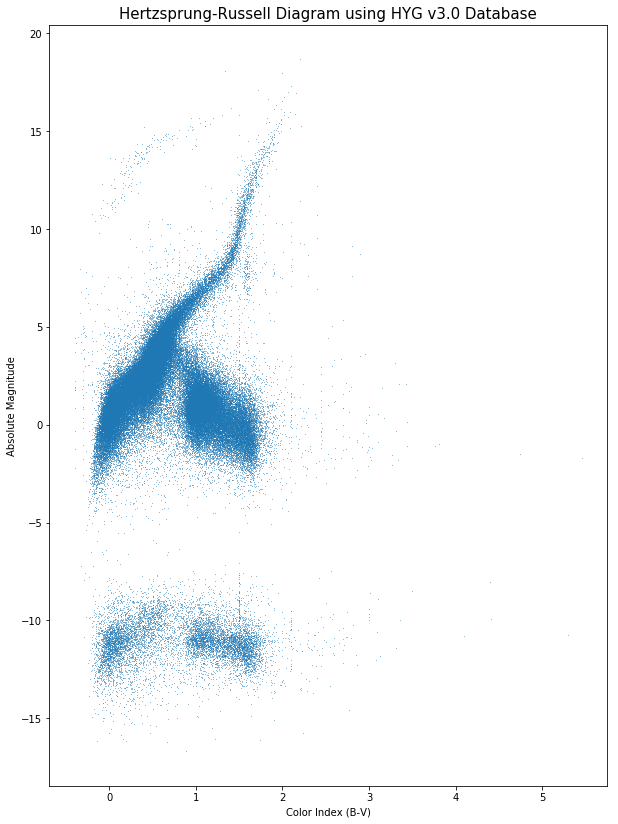

In [245]:
fig,ax = plt.subplots(figsize=(10, 14))


ax.set_title('Hertzsprung-Russell Diagram using HYG v3.0 Database', fontsize=15)
ax.set_xlabel('Color Index (B-V)')
ax.set_ylabel('Absolute Magnitude')

ax.scatter(x,y,marker='.',s=1.5,linewidth=0)

Absolute magnitudes are higher if their negative absolute values are greater, so we reverse the y-axis.

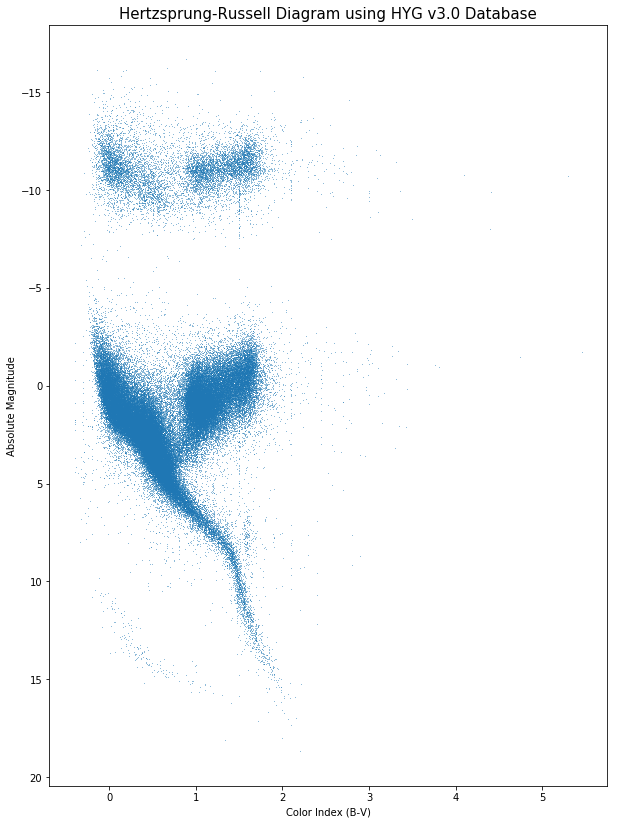

In [246]:
fig,ax = plt.subplots(figsize=(10, 14))


ax.set_title('Hertzsprung-Russell Diagram using HYG v3.0 Database', fontsize=15)
ax.set_xlabel('Color Index (B-V)')
ax.set_ylabel('Absolute Magnitude')

ax.scatter(x,y,marker='.',s=1.5,linewidth=0)

ax.invert_yaxis()

We are limiting the y-axis from 20 to -7.5 because there seems to be an error within the database wherein it contains a huge number of supergiants in which they are very few from the Hipparcos dialogue.

Source: https://www.reddit.com/r/dataisbeautiful/comments/433960/got_bored_with_a_lot_of_the_hertzsprungrussell/czfres5/

(17.5, -7.5)

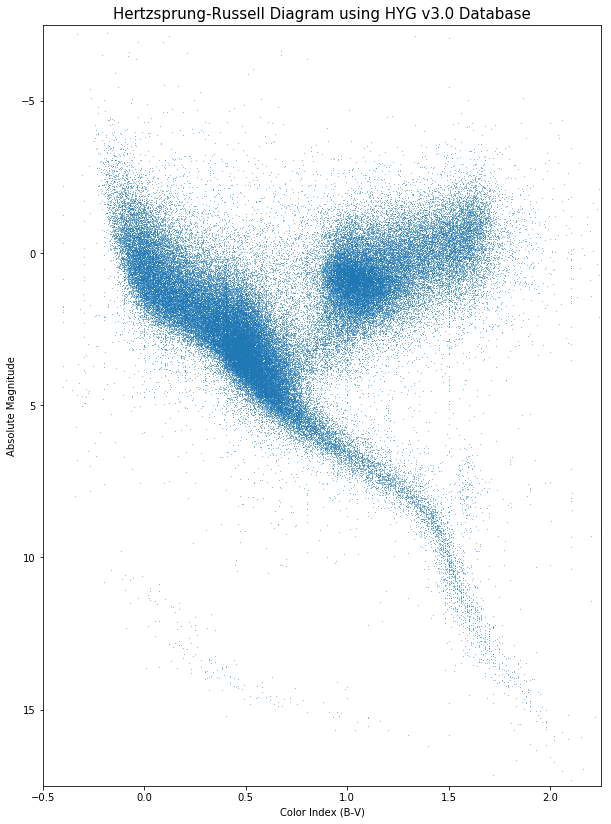

In [247]:
fig,ax = plt.subplots(figsize=(10, 14))


ax.set_title('Hertzsprung-Russell Diagram using HYG v3.0 Database', fontsize=15)
ax.set_xlabel('Color Index (B-V)')
ax.set_ylabel('Absolute Magnitude')

ax.scatter(x,y,marker='.',s=1.5,linewidth=0)

ax.invert_yaxis()
ax.set_xlim(-0.5, 2.25)
ax.set_ylim(17.5, -7.5)#reverses axis

## Plotting with black background and white text 

with minor figsize adjustment

reference: http://sphinx-gallery.readthedocs.io/en/latest/auto_examples/sin_func/plot_sin_black_background.html

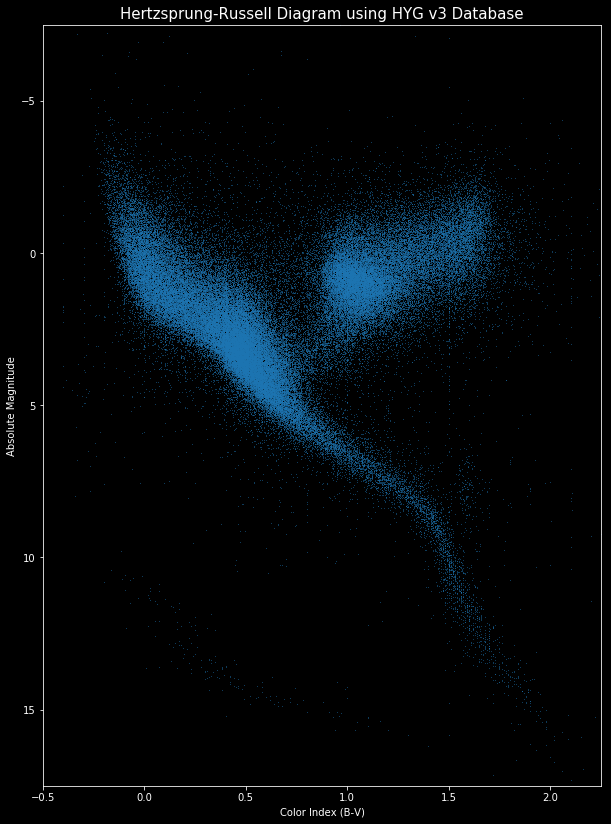

In [248]:
fig,ax = plt.subplots(figsize=(10, 14),facecolor='black')

ax.set_facecolor('black')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram using HYG v3 Database', color='white', fontsize=15)
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

ax.scatter(x,y,marker='.',s=1.5,linewidth=0)

ax.invert_yaxis()
ax.set_xlim(-0.5, 2.25)
ax.set_ylim(17.5, -7.5)
ax.tick_params(colors='white')

We apply the colormap "" to the scatter plot in order to show that stars with higher absolute values in their color indices are redder and therefore cooler than the bluish ones.

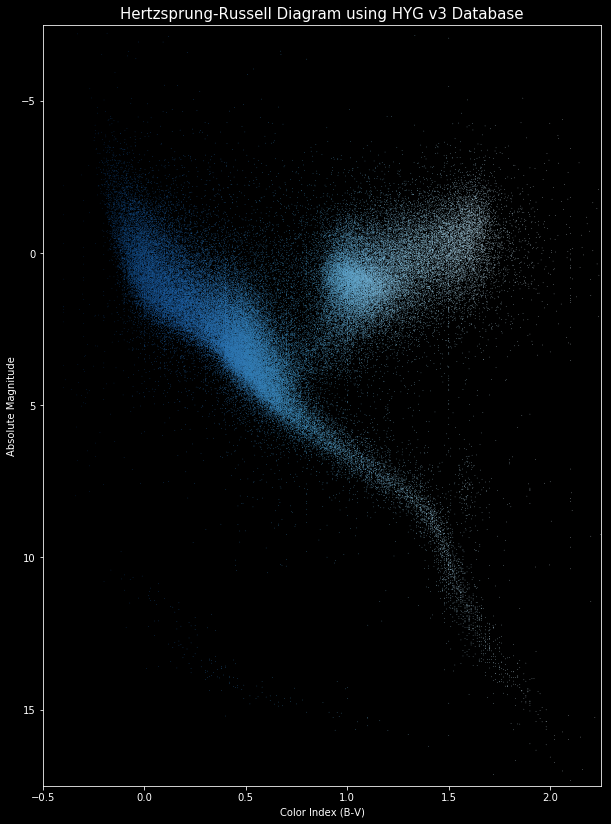

In [249]:
fig,ax = plt.subplots(figsize=(10, 14),facecolor='black')
#cm = plt.cm.get_cmap('RdBu_r')

ax.set_facecolor('black')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram using HYG v3 Database', color='white', fontsize=15)
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

ax.scatter(x,y,marker='.',s=1.5, linewidth=0, c=x,cmap='RdBu_r')

ax.invert_yaxis()
ax.set_xlim(-0.5, 2.25)
ax.set_ylim(17.5, -7.5)
ax.tick_params(colors='white')

The fact that only blue is shown in the plot tells us that most stars in the catalog have color index < 2. We can confirm by looking at the histogram/distribution of the color index of the stars.

In [250]:
min(x), max(x)

(-0.40000000000000002, 5.46)

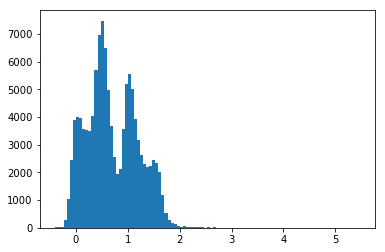

In [251]:
plt.hist(x, bins=100);

Yep, almost all have ci<2. So let's just plot ci<2 using pandas `query`.

Now use new x and y variables.


In [252]:
df_masked = df.query('ci < 2')

Now use new x and y variables.

In [253]:
x_masked = df_masked['ci']
y_masked = df_masked['absmag']

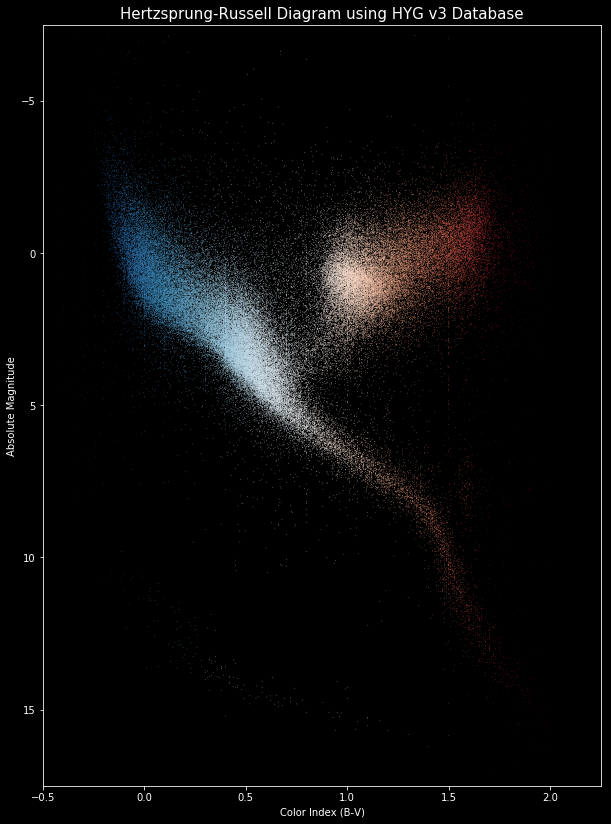

In [254]:
fig,ax = plt.subplots(figsize=(10, 14),facecolor='black')

ax.set_facecolor('black')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram using HYG v3 Database', color='white', fontsize=15)
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

path = ax.scatter(x_masked,y_masked,marker='.',s=1.5,c=x_masked,cmap='RdBu_r',linewidth=0)

ax.invert_yaxis()
ax.set_xlim(-0.5, 2.25)
ax.set_ylim(17.5, -7.5)
ax.tick_params(colors='white')

## Manually Annotate Stars

We will manually determine the absmag and ci of stars by looking up their names thru the "proper" column. If not present, we could look up their Hipparcos, Henry Draper and Gliese catalogue numbers at the hip, hd or gl columns respectively

Sun

In [255]:
df[df["proper"]=="Sol"]

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
0,0,NaN,NaN,NaN,NaN,NaN,Sol,0.0,0.0,0.0,...,NaN,NaN,NaN,1,0,NaN,1.0,NaN,NaN,NaN


In [256]:
df[df["proper"]=="Sol"][["ci","absmag"]]

,ci,absmag
0,0.656,4.85


Procyon

In [257]:
df[df["proper"]=="Procyon"][["ci","absmag"]]

,ci,absmag
37173,0.432,2.671


Aldebaran

In [258]:
df[df["proper"]=="Aldebaran"][["ci","absmag"]]

,ci,absmag
21368,1.538,-0.682


Betelgeuse

In [259]:
df[df["proper"]=="Betelgeuse"][["ci","absmag"]]

,ci,absmag
27919,1.5,-5.469


Sirius A

In [260]:
df[df["proper"]=="Sirius"][["ci","absmag"]]

,ci,absmag
32263,0.009,1.454


40 Eridani A

In [261]:
df[df["hd"]==26965][["ci","absmag"]]

,ci,absmag
19799,0.82,5.942


40 Eridani B

In [262]:
df[df["hd"]==26976][["ci","absmag"]]

,ci,absmag
118280,0.03,11.006


Regulus

In [263]:
df[df["proper"]=="Regulus"][["ci","absmag"]]

,ci,absmag
49528,-0.087,-0.569


Rigel

In [264]:
df[df["proper"]=="Rigel"][["ci","absmag"]]

,ci,absmag
24378,-0.03,-6.933


Alpha Centauri A

In [265]:
df[df["proper"]=="Rigil Kentaurus"][["ci","absmag"]]

,ci,absmag
71456,0.71,4.379


Alpha Centauri B

In [266]:
df[df["hd"]==128621][["ci","absmag"]]

,ci,absmag
71453,0.9,5.739


Proxima Centauri

In [267]:
df[df["proper"]=="Proxima Centauri"][["ci","absmag"]]

,ci,absmag
70666,1.807,15.447


Polaris

In [268]:
df[df["proper"]=="Polaris"][["ci","absmag"]]

,ci,absmag
11734,0.636,-3.643


Arcturus

In [269]:
df[df["proper"]=="Arcturus"][["ci","absmag"]]

,ci,absmag
69451,1.239,-0.307


Lalande 21185

In [270]:
df[df["hd"]==95735][["ci","absmag"]]

,ci,absmag
53879,1.502,10.46


GJ 440

In [271]:
df[df["hip"]==57367][["ci","absmag"]]

,ci,absmag
57194,0.196,13.182


Gliese 293

In [272]:
df[df["gl"]=="Gl 293"][["ci","absmag"]]

,ci,absmag
118508,0.66,14.882


Pollux

In [273]:
df[df["proper"]=="Pollux"][["ci","absmag"]]

,ci,absmag
37718,0.991,1.084


Antares

In [274]:
df[df["proper"]=="Antares"][["ci","absmag"]]

,ci,absmag
80519,1.865,-5.089


Deneb

In [275]:
df[df["proper"]=="Deneb"][["ci","absmag"]]

,ci,absmag
101767,0.092,-6.932


Barnard's Star

In [276]:
df[df["proper"]=="Barnard's Star"][["ci","absmag"]]

,ci,absmag
87665,1.57,13.235


Gacrux

In [277]:
df[df["proper"]=="Gacrux"][["ci","absmag"]]

,ci,absmag
60893,1.6,-0.579


Mira

In [278]:
df[df["proper"]=="Mira"][["ci","absmag"]]

,ci,absmag
10800,0.966,1.659


Bellatrix

In [279]:
df[df["proper"]=="Bellatrix"][["ci","absmag"]]

,ci,absmag
25273,-0.224,-2.804


Vega

In [280]:
df[df["proper"]=="Vega"][["ci","absmag"]]

,ci,absmag
90979,-0.001,0.604


Canopus

In [281]:
df[df["proper"]=="Canopus"][["ci","absmag"]]

,ci,absmag
30365,0.164,-5.504


61 Cygni A

In [282]:
df[df["hip"]==104214][["ci","absmag"]]

,ci,absmag
103879,1.069,7.488


61 Cygni B

In [283]:
df[df["hip"]==104217][["ci","absmag"]]

,ci,absmag
103883,1.309,8.331


Now, plot with individually adjustable annotations.

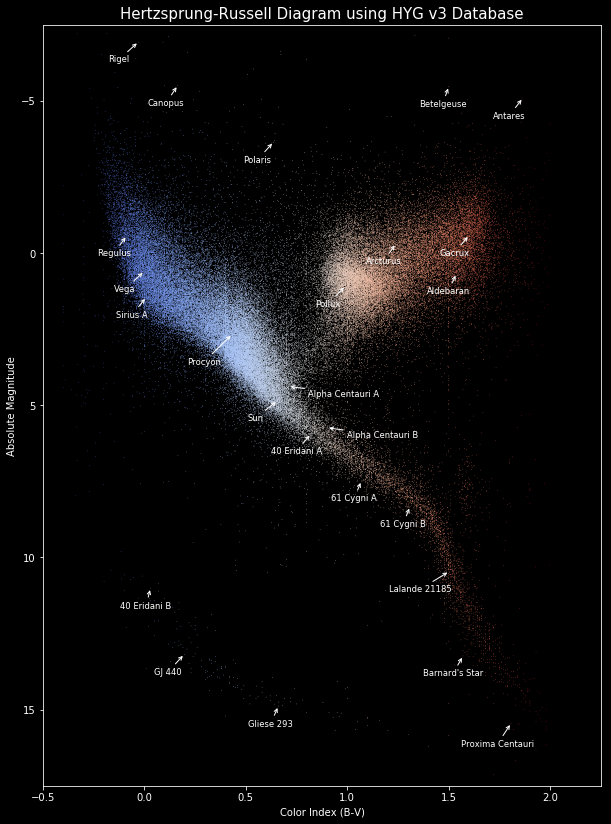

In [284]:
fig,ax = plt.subplots(figsize=(10, 14),facecolor='black')

ax.set_facecolor('black')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram using HYG v3 Database', color='white', fontsize=15)
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

ax.scatter(x_masked,y_masked,marker='.',s=1.5,c=x_masked,cmap='coolwarm', linewidth=0)

ax.invert_yaxis()
ax.set_xlim(-0.5, 2.25)
ax.set_ylim(17.5, -7.5)#reverses axis
ax.tick_params(colors='white')


#Sun
ax.annotate(
    'Sun', xy=(0.656 ,4.85), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Procyon
ax.annotate(
    'Procyon', xy=(0.432 ,2.671), xycoords='data',
    fontsize='small', color='white',
    xytext=(-45, -30), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Aldebaran
ax.annotate(
    'Aldebaran', xy=(1.538 ,0.682), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Betelgeuse
ax.annotate(
    'Betelgeuse', xy=(1.5 ,-5.469), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Sirius A
ax.annotate(
    'Sirius A', xy=(0.009 ,1.454), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#40 Eridani A
ax.annotate(
    '40 Eridani A', xy=(0.82 ,5.942), xycoords='data',
    fontsize='small', color='white',
    xytext=(-40, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#40 Eridani B
ax.annotate(
    '40 Eridani B', xy=(0.03 ,11.006), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#Regulus
ax.annotate(
    'Regulus', xy=(-0.087 ,-0.569), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#Rigel
ax.annotate(
    'Rigel', xy=(-0.03 ,-6.933), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Alpha Centauri A
ax.annotate(
    'Alpha Centauri A', xy=(0.71 ,4.379), xycoords='data',
    fontsize='small', color='white',
    xytext=(20, -10), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Alpha Centauri B
ax.annotate(
    'Alpha Centauri B', xy=(0.9 ,5.739), xycoords='data',
    fontsize='small', color='white',
    xytext=(20, -10), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#Proxima Centauri
ax.annotate(
    'Proxima Centauri', xy=(1.807 ,15.447), xycoords='data',
    fontsize='small', color='white',
    xytext=(-50, -25), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'),
    horizontalalignment='left',
    verticalalignment='bottom')


#Polaris
ax.annotate(
    'Polaris', xy=(0.636,-3.643), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Arcturus
ax.annotate(
    'Arcturus', xy=(1.239 ,-0.307), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Lalande 21185
ax.annotate(
    'Lalande 21185', xy=(1.502 ,10.46), xycoords='data',
    fontsize='small', color='white',
    xytext=(-60, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#GJ 440
ax.annotate(
    'GJ 440', xy=(0.196 ,13.182), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Gliese 293
ax.annotate(
    'Gliese 293', xy=(0.66 ,14.882), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#Pollux
ax.annotate(
    'Pollux', xy=(0.991 ,1.084), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Antares
ax.annotate(
    'Antares', xy=(1.865 ,-5.089), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))



#Barnard's Star
ax.annotate(
    "Barnard's Star", xy=(1.57 ,13.235), xycoords='data',
    fontsize='small', color='white',
    xytext=(-40, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#Gacrux
ax.annotate(
    "Gacrux", xy=(1.6 ,-0.579), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))



#Vega
ax.annotate(
    "Vega", xy=(-0.001 ,0.604), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#Canopus
ax.annotate(
    "Canopus", xy=(0.164 ,-5.504), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#61 Cygni A
ax.annotate(
    "61 Cygni A", xy=(1.069 ,7.488), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#61 Cygni B
ax.annotate(
    "61 Cygni B", xy=(1.309 ,8.331), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

Plot with

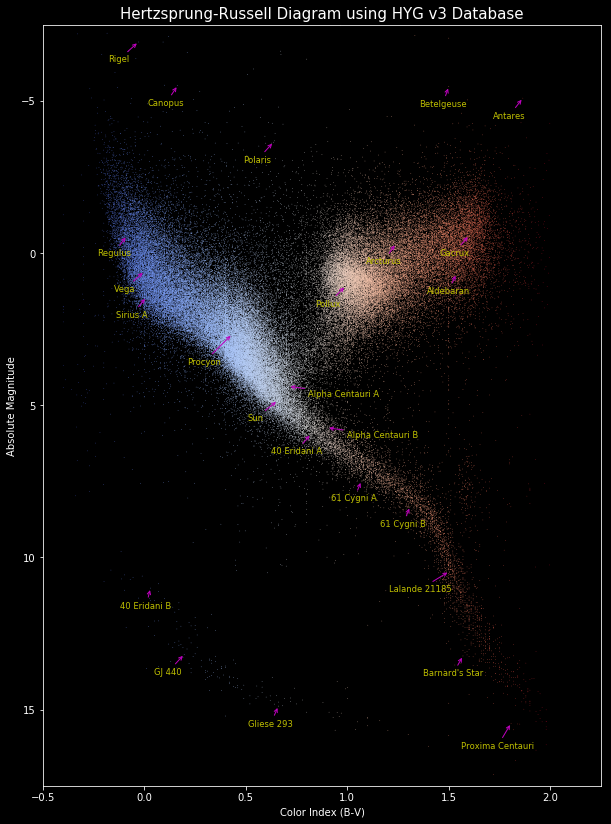

In [285]:
fig,ax = plt.subplots(figsize=(10, 14),facecolor='black')

ax.set_facecolor('black')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram using HYG v3 Database', color='white', fontsize=15)
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

ax.scatter(x_masked,y_masked,marker='.',s=1.5,c=x_masked,cmap='coolwarm', linewidth=0)

ax.invert_yaxis()
ax.set_xlim(-0.5, 2.25)
ax.set_ylim(17.5, -7.5)#reverses axis
ax.tick_params(colors='white')


#Sun
ax.annotate(
    'Sun', xy=(0.656 ,4.85), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))

#Procyon
ax.annotate(
    'Procyon', xy=(0.432 ,2.671), xycoords='data',
    fontsize='small', color='y',
    xytext=(-45, -30), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))

#Aldebaran
ax.annotate(
    'Aldebaran', xy=(1.538 ,0.682), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))

#Betelgeuse
ax.annotate(
    'Betelgeuse', xy=(1.5 ,-5.469), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))

#Sirius A
ax.annotate(
    'Sirius A', xy=(0.009 ,1.454), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))

#40 Eridani A
ax.annotate(
    '40 Eridani A', xy=(0.82 ,5.942), xycoords='data',
    fontsize='small', color='y',
    xytext=(-40, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))

#40 Eridani B
ax.annotate(
    '40 Eridani B', xy=(0.03 ,11.006), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))


#Regulus
ax.annotate(
    'Regulus', xy=(-0.087 ,-0.569), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))


#Rigel
ax.annotate(
    'Rigel', xy=(-0.03 ,-6.933), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))

#Alpha Centauri A
ax.annotate(
    'Alpha Centauri A', xy=(0.71 ,4.379), xycoords='data',
    fontsize='small', color='y',
    xytext=(20, -10), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))

#Alpha Centauri B
ax.annotate(
    'Alpha Centauri B', xy=(0.9 ,5.739), xycoords='data',
    fontsize='small', color='y',
    xytext=(20, -10), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))


#Proxima Centauri
ax.annotate(
    'Proxima Centauri', xy=(1.807 ,15.447), xycoords='data',
    fontsize='small', color='y',
    xytext=(-50, -25), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))



#Polaris
ax.annotate(
    'Polaris', xy=(0.636,-3.643), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))

#Arcturus
ax.annotate(
    'Arcturus', xy=(1.239 ,-0.307), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))

#Lalande 21185
ax.annotate(
    'Lalande 21185', xy=(1.502 ,10.46), xycoords='data',
    fontsize='small', color='y',
    xytext=(-60, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))

#GJ 440
ax.annotate(
    'GJ 440', xy=(0.196 ,13.182), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))

#Gliese 293
ax.annotate(
    'Gliese 293', xy=(0.66 ,14.882), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))


#Pollux
ax.annotate(
    'Pollux', xy=(0.991 ,1.084), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))

#Antares
ax.annotate(
    'Antares', xy=(1.865 ,-5.089), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))



#Barnard's Star
ax.annotate(
    "Barnard's Star", xy=(1.57 ,13.235), xycoords='data',
    fontsize='small', color='y',
    xytext=(-40, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))


#Gacrux
ax.annotate(
    "Gacrux", xy=(1.6 ,-0.579), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))



#Vega
ax.annotate(
    "Vega", xy=(-0.001 ,0.604), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))


#Canopus
ax.annotate(
    "Canopus", xy=(0.164 ,-5.504), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))


#61 Cygni A
ax.annotate(
    "61 Cygni A", xy=(1.069 ,7.488), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))


#61 Cygni B
ax.annotate(
    "61 Cygni B", xy=(1.309 ,8.331), xycoords='data',
    fontsize='small', color='y',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='m'))


## Plotting stars using list of 50 brightest stars from Wikipedia 

Check:

In [286]:
df.query('proper == "Sirius"')

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
32263,32263,32349.0,48915.0,2491.0,Gl 244A,9Alp CMa,Sirius,6.752481,-16.716116,2.6371,...,Alp,9.0,CMa,1,32263,Gl 244,22.824433,NaN,-1.333,-1.523


Now, get list of stars with proper names. There is a table in wikipedia. Let's parse that table directly using pandas `read_html`.

In [287]:
html=pd.read_html("https://en.wikipedia.org/wiki/List_of_brightest_stars")

It will return a list of dataframes read from the link. Check the first table.

In [288]:
html[0].head()

,0,1,2,3,4
0,V Mag. (mV),Proper name,Bayer designation,Distance (ly),Spectral class
1,0.0002998732600000000000♠−26.74,Sun,NaN,0.000 015 813,G2 V
2,0.0012999853999999999999♠−1.46,Sirius,α CMa,0008.6,"A1 V, DA2"
3,0.0033000280000000000000♠−0.74,Canopus,α Car,0310,A9 II
4,0.0043000730000000000000♠−0.27 (0.01 + 1.33),Rigil Kentaurus,α Cen,0004.4,"G2 V, K1 V"


Use the first dataframe which has a column named "1" that contains the proper name.

In [289]:
names = html[0][1]

We will not include the first row because it has column names.

In [290]:
starnames = names[1:]

Now for each name in starnames, query it from df and `try` to plot. If there's a problem, then use `exception`. (Note we query in df not in df_masked!)

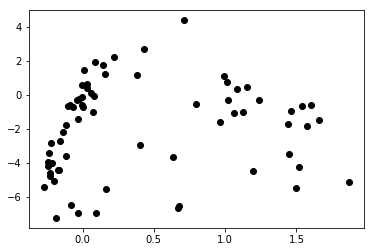

In [291]:
for name in starnames.values:
    df_star=df.query('proper == @name')
    yy = df_star['absmag'].values
    xx = df_star['ci'].values
    try:
        plt.plot(xx,yy,'ko')
    except:
        print('{} is not found'.format(name))

We can add labels to each one of them like so:

In [292]:
plt.text?

Sun is not found
Mimosa is not found
Elnath is not found


UnicodeEncodeError: 'ascii' codec can't encode character u'\u2013' in position 0: ordinal not in range(128)

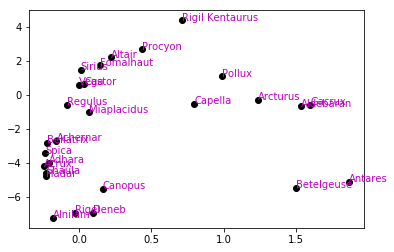

In [293]:
for name in starnames.values:
    df_star=df.query('proper == @name')
    yy = df_star['absmag'].values
    xx = df_star['ci'].values
    try:
        plt.plot(xx,yy,'ko')
        #add labels
        plt.text(xx[0],yy[0],s=name,color='m')
    except:
        print('{} is not found'.format(name))

Now, let's combine the two plots.

In [ ]:
fig,ax = plt.subplots(figsize=(10, 14),facecolor='black')

ax.set_facecolor('black')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram using HYG v3 Database', color='white', fontsize=15)
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

path = ax.scatter(x_masked,y_masked,marker='.',s=1.5,c=x_masked,cmap='RdBu_r',linewidth=0)

ax.invert_yaxis()
ax.set_xlim(-0.5, 2.25)
ax.set_ylim(17.5, -7.5)
ax.tick_params(colors='white')

#ADD STARS WITH PROPER NAMES
for name in starnames.values:
    df_star=df.query('proper == @name')
    yy = df_star['absmag'].values
    xx = df_star['ci'].values
    try:
        ax.plot(xx,yy,'yo')
        #add labels
        ax.text(xx[0],yy[0],s=name,color='m')
    except:
        pass
        #print('{} is not found'.format(name))

We can do better by using a package named [adjust_text](https://github.com/Phlya/adjustText) that labels the name with proper spacing. You can install it using:

In [ ]:
import pip
import conda
pip.main(['install', 'adjustText'])

Don't forget to import it. Check the documentation how to use properly.

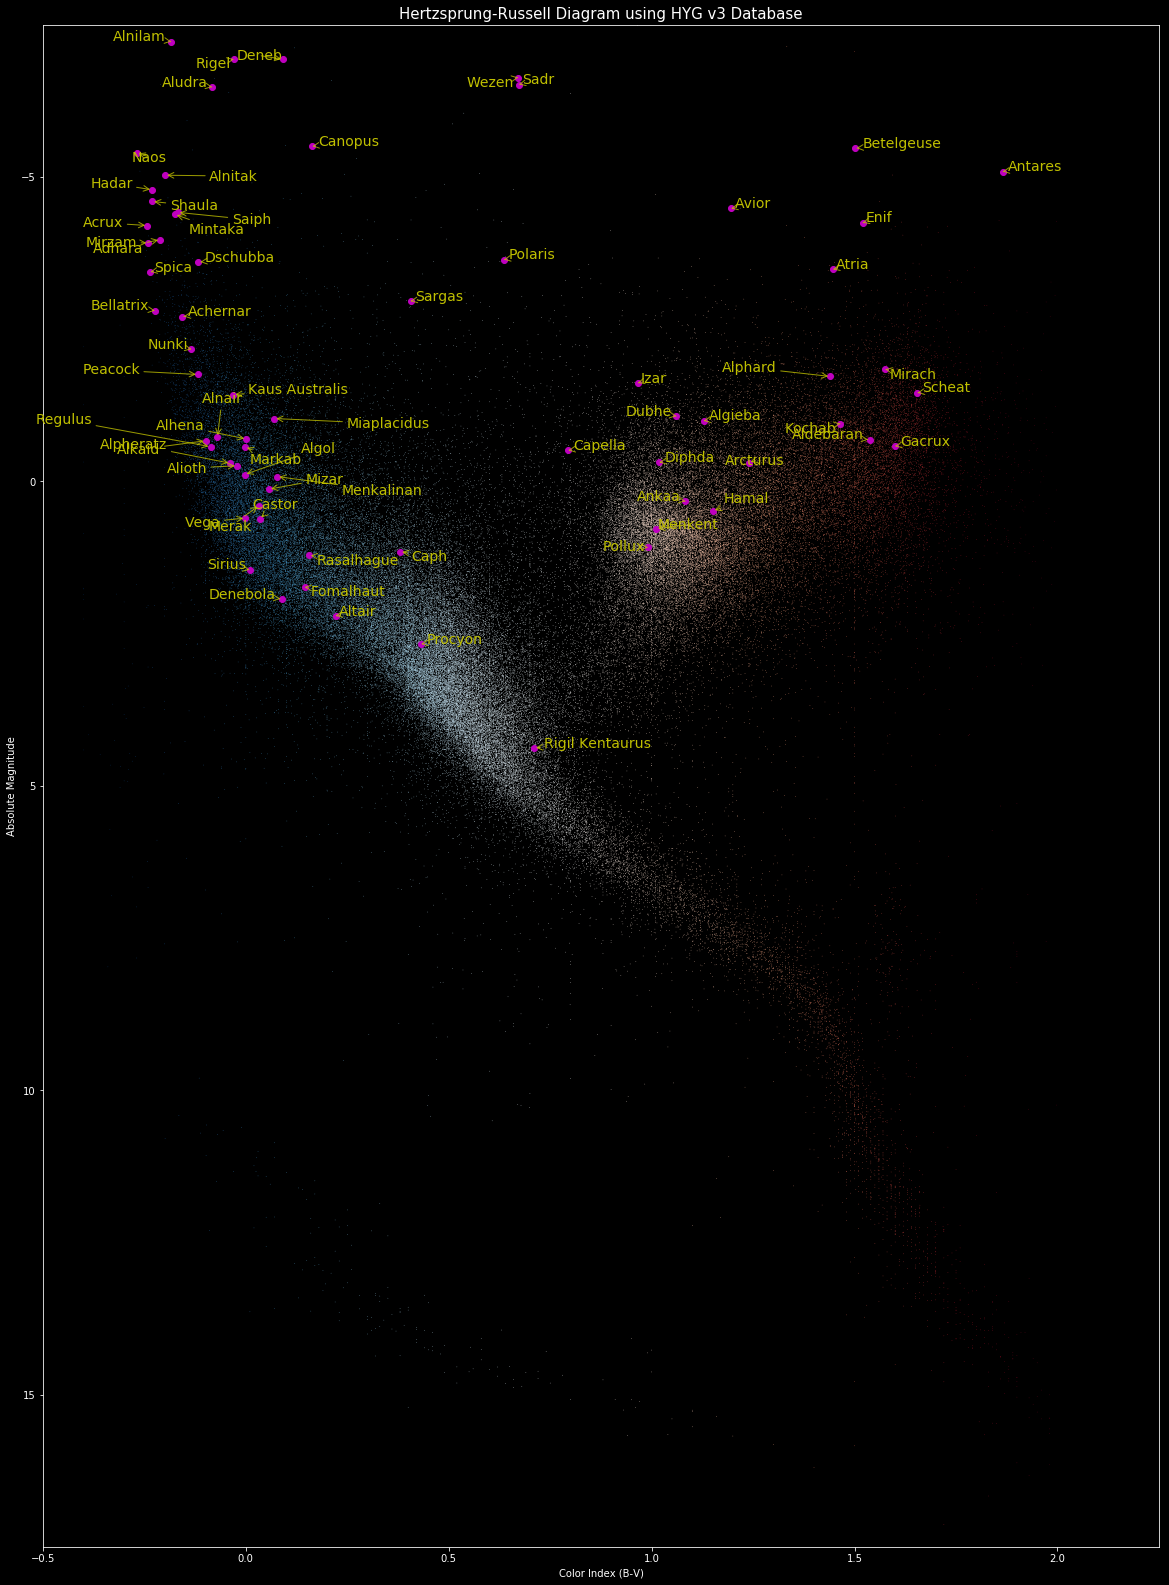

In [294]:
fig,ax = plt.subplots(figsize=(20, 28),facecolor='black')

ax.set_facecolor('black')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram using HYG v3 Database', color='white', fontsize=15)
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

ax.scatter(x_masked,y_masked,marker='.',s=1.5,c=x_masked,cmap='RdBu_r', linewidth=0)


#ADD STARS WITH PROPER NAMES
texts=[]

for name in starnames.values:
    df_star=df.query('proper == @name')
    yy = df_star['absmag'].values
    xx = df_star['ci'].values
    try:
        ax.plot(xx,yy,'mo')
        #add labels
        #ax.text(xx[0],yy[0],s=name,color='m')
        
        #instead of above, add this to make adjust_text work
        texts.append(plt.text(xx[0],yy[0],name,color='y',fontsize=14))
    except:
        pass
        #print('{} is not found'.format(name))
adjust_text(texts, arrowprops=dict(arrowstyle="->",
                                   color='y', 
                                   alpha=0.8))

ax.invert_yaxis()
ax.set_xlim(-0.5, 2.25)
ax.set_ylim(17.5, -7.5)
ax.tick_params(colors='white')

## Annotate Star Types

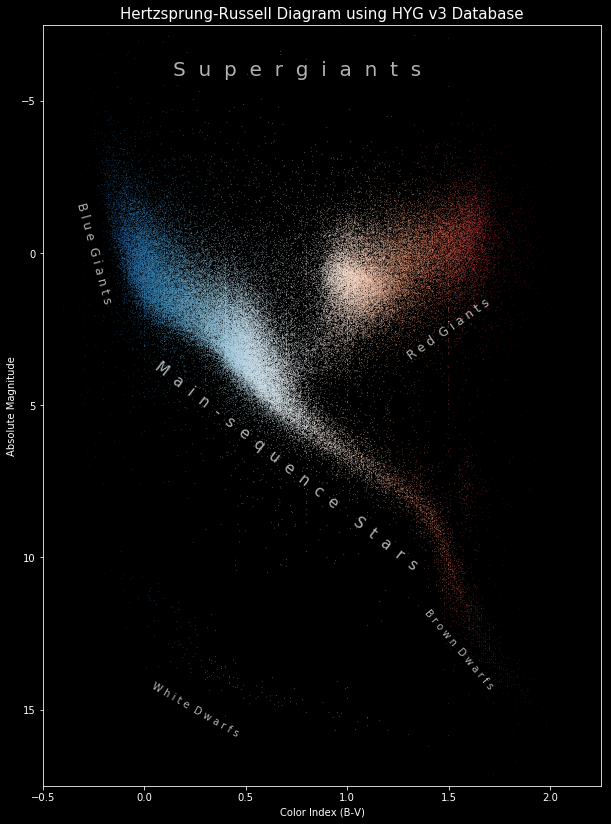

In [295]:
fig,ax = plt.subplots(figsize=(10, 14),facecolor='black')

ax.set_facecolor('black')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram using HYG v3 Database', color='white', fontsize=15)
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

path = ax.scatter(x_masked,y_masked,marker='.',s=1.5,c=x_masked,cmap='RdBu_r',linewidth=0)

ax.invert_yaxis()
ax.set_xlim(-0.5, 2.25)
ax.set_ylim(17.5, -7.5)
ax.tick_params(colors='white')

ax.text(0.7, 7, 'M  a  i  n  -  s  e  q  u  e  n  c  e     S  t  a  r  s',
        horizontalalignment='center',
        verticalalignment='center', 
        color='white',
        fontsize=15,
        alpha = 0.7,
        rotation=-38)

ax.text(1.5, 2.5, 'R e d  G i a n t s',
        horizontalalignment='center',
        verticalalignment='center', 
        color='white',
        fontsize=12,
        alpha = 0.7,
        rotation=35)

ax.text(0.75, -6, 'S  u  p  e  r  g  i  a  n  t  s',
        horizontalalignment='center',
        verticalalignment='center', 
        color='white',
        fontsize=20,
        alpha = 0.7,
        rotation=0)

ax.text(0.25, 15, 'W h i t e  D w a r f s',
        horizontalalignment='center',
        verticalalignment='center', 
        color='white',
        fontsize=10,
        alpha = 0.7,
        rotation=-30)

ax.text(1.55, 13, 'B r o w n  D w a r f s',
        horizontalalignment='center',
        verticalalignment='center', 
        color='white',
        fontsize=10,
        alpha = 0.7,
        rotation=-50)

ax.text(-0.25, 0, 'B l u e  G i a n t s',
        horizontalalignment='center',
        verticalalignment='center', 
        color='white',
        fontsize=12,
        alpha = 0.7,
        rotation=-75)

# Annotate Star Types and the Sun's position

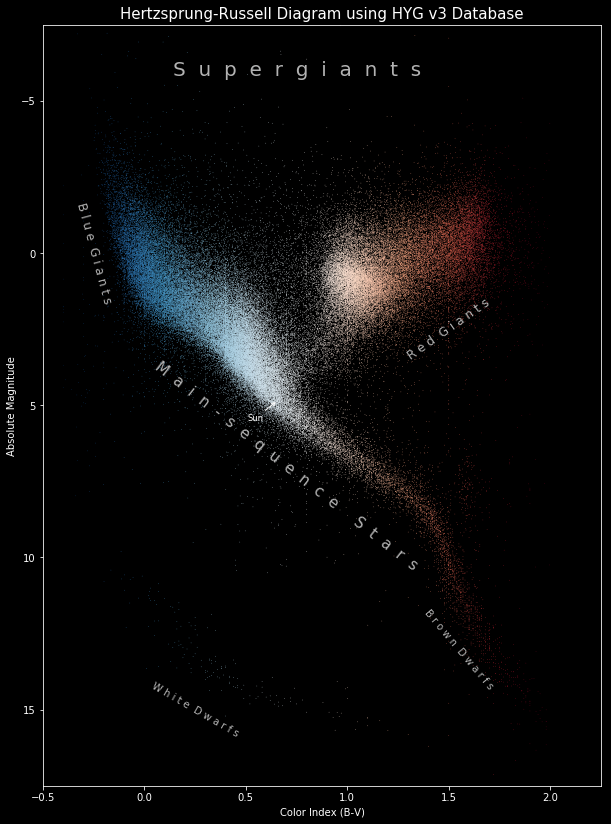

In [297]:
fig,ax = plt.subplots(figsize=(10, 14),facecolor='black')

ax.set_facecolor('black')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram using HYG v3 Database', color='white', fontsize=15)
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

path = ax.scatter(x_masked,y_masked,marker='.',s=1.5,c=x_masked,cmap='RdBu_r',linewidth=0)

ax.invert_yaxis()
ax.set_xlim(-0.5, 2.25)
ax.set_ylim(17.5, -7.5)
ax.tick_params(colors='white')

ax.text(0.7, 7, 'M  a  i  n  -  s  e  q  u  e  n  c  e     S  t  a  r  s',
        horizontalalignment='center',
        verticalalignment='center', 
        color='white',
        fontsize=15,
        alpha = 0.7,
        rotation=-38)

ax.text(1.5, 2.5, 'R e d  G i a n t s',
        horizontalalignment='center',
        verticalalignment='center', 
        color='white',
        fontsize=12,
        alpha = 0.7,
        rotation=35)

ax.text(0.75, -6, 'S  u  p  e  r  g  i  a  n  t  s',
        horizontalalignment='center',
        verticalalignment='center', 
        color='white',
        fontsize=20,
        alpha = 0.7,
        rotation=0)

ax.text(0.25, 15, 'W h i t e  D w a r f s',
        horizontalalignment='center',
        verticalalignment='center', 
        color='white',
        fontsize=10,
        alpha = 0.7,
        rotation=-30)

ax.text(1.55, 13, 'B r o w n  D w a r f s',
        horizontalalignment='center',
        verticalalignment='center', 
        color='white',
        fontsize=10,
        alpha = 0.7,
        rotation=-50)

ax.text(-0.25, 0, 'B l u e  G i a n t s',
        horizontalalignment='center',
        verticalalignment='center', 
        color='white',
        fontsize=12,
        alpha = 0.7,
        rotation=-75)

ax.annotate(
    'Sun', xy=(0.656 ,4.85), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))